In [1]:
#%matplotlib qt
%matplotlib inline

In [185]:
import pandas as pd
import numpy as np
import scipy.stats as st
from ggplot import *
import datetime
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
turnstile_weather = pd.read_csv('./improved-dataset/turnstile_weather_v2.csv')

In [196]:
turnstile_weather['DAYn'] = turnstile_weather.datetime.map(lambda x: pd.to_datetime(x).day)

In [43]:
# Remove ENTRIESn_hourly outliers. The argument should be turnstile_weather (or with the same structure)
def remove_outliers(df):
    q1 = df.ENTRIESn_hourly.quantile(0.25)
    q3 = df.ENTRIESn_hourly.quantile(0.75)
    iqr = q3-q1
    no_outliers = df[np.abs(df.ENTRIESn_hourly - df.ENTRIESn_hourly.mean()) <= iqr]
    with_outliers = df[np.abs(df.ENTRIESn_hourly - df.ENTRIESn_hourly.mean()) > iqr]
    return no_outliers, with_outliers

In [160]:
def check_relation(df, column):
    x = sm.add_constant(df[column])
    #x = turnstile_weather[column]
    model = sm.OLS(df.ENTRIESn_hourly, x)
    fit = model.fit()
    tw_no_outliers, tw_with_outliers = remove_outliers(df)
    turn_prec_mean = df.groupby(column, as_index=False).mean()
    turn_prec_median = df.groupby(column, as_index=False).median()
    p = ggplot(df, aes(x=column, y='ENTRIESn_hourly')) + geom_point(alpha=0.01, color='cyan') +\
        geom_line(turn_prec_mean, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2, alpha=0.9) +\
        geom_line(turn_prec_median, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2, alpha=0.7) +\
        stat_smooth(color='yellow', size=2) +\
        stat_smooth(color='yellow', size=2, method='lm') +\
        stat_smooth(tw_no_outliers, color='black',se=False) +\
        stat_smooth(tw_no_outliers, color='black',se=False, method='lm') +\
        ggtitle('r-squared = ' + str(fit.rsquared)) +\
        ylim(0, 5000)
    print p
    return fit

# Mean and median ENTRIESn_hourly for different stations

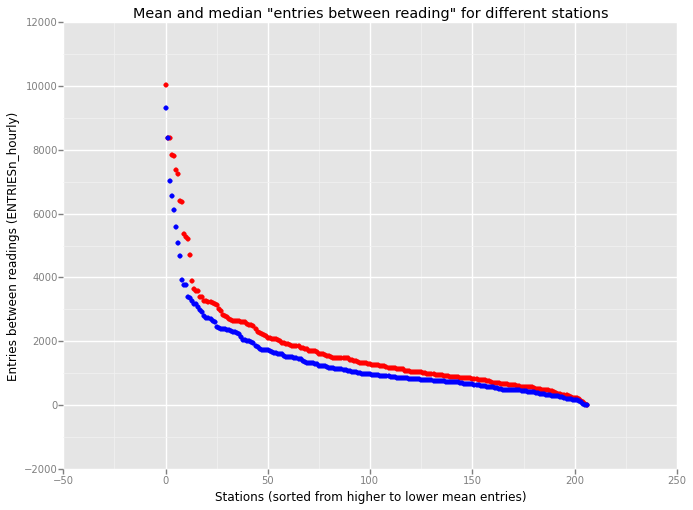

<ggplot: (317656137)>

In [152]:
new_group_mean = turnstile_weather.groupby('station', as_index=False).mean().sort('ENTRIESn_hourly', ascending=False).reset_index()
new_group_median = turnstile_weather.groupby('station', as_index=False).median().sort('ENTRIESn_hourly', ascending=False).reset_index()
ggplot(new_group_mean, aes(x=new_group_mean.index, y='ENTRIESn_hourly')) + geom_point(color='red') +\
    geom_point(new_group_median, aes(x=new_group_median.index, y='ENTRIESn_hourly'), color='blue') +\
    ggtitle('Mean and median "entries between reading" for different stations') +\
    xlab('Stations (sorted from higher to lower mean entries)') +\
    ylab('Entries between readings (ENTRIESn_hourly)')

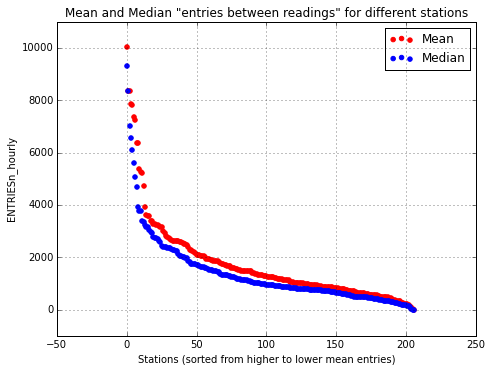

In [312]:
my_dpi = 96
plt.figure(figsize=(480*1.5/my_dpi,360*1.5/my_dpi), dpi=my_dpi)
ax1 = plt.scatter(new_group_mean.index, new_group_mean.ENTRIESn_hourly, label='Mean', color='red')
plt.scatter(new_group_median.index, new_group_median.ENTRIESn_hourly, label='Median', color='blue')
plt.grid()
plt.xlabel('Stations (sorted from higher to lower mean entries)')
plt.ylabel('ENTRIESn_hourly')
plt.title('Mean and Median "entries between readings" for different stations')
plt.ylim(-1000, 11000)
plt.legend()
plt.savefig('../web-project/images/figure3.png', dpi=my_dpi)
plt.show()

In [99]:
new_group_mean

,index,station,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,DAYn
0,61,59 ST-COLUMBUS,1.401795e+08,91131836.650538,10046.634409,7888.913978,10.000000,2.935484,0.709677,40.768110,...,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.769104,-73.989792,16.000000
1,47,42 ST-GRD CNTRL,1.374496e+08,73056306.962366,8360.844086,5207.295699,10.000000,2.935484,0.709677,40.751849,...,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.752632,-73.979225,16.000000
2,157,MAIN ST,1.293258e+08,98195340.370968,8359.172043,6316.951613,10.000000,2.935484,0.709677,40.759578,...,0.225806,62.557527,9.258602,0.001559,29.965806,62.557527,9.258602,40.730999,-73.839951,16.000000
3,43,34 ST-HERALD SQ,1.197922e+08,79185624.997312,7851.846774,5379.567204,10.000000,2.935484,0.709677,40.749533,...,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.746399,-73.981598,16.000000
4,184,ROOSEVELT AVE,7.633678e+07,59755435.091892,7808.481081,6487.135135,10.010811,2.924324,0.713514,40.746655,...,0.227027,62.570811,9.271351,0.001568,29.966378,62.570811,9.271351,40.720570,-73.888191,16.048649
5,48,42 ST-PA BUS TE,1.539926e+08,69963489.103261,7366.804348,2632.347826,10.021739,2.913043,0.717391,40.757303,...,0.228261,63.426087,5.535326,0.006250,29.974185,63.426087,5.535326,40.752632,-73.979225,16.059783
6,206,WORLD TRADE CTR,1.128009e+08,70343784.198925,7245.844086,4150.129032,10.000000,2.935484,0.709677,40.712557,...,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.708031,-74.014870,16.000000
7,52,47-50 ST-ROCK,1.100130e+08,90782610.279570,6389.865591,6069.779570,10.000000,2.935484,0.709677,40.758652,...,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.752632,-73.979225,16.000000
8,49,42 ST-TIMES SQ,7.233137e+07,52549318.994609,6363.830189,5506.819407,10.005391,2.932615,0.708895,40.755905,...,0.226415,63.408895,5.537197,0.006199,29.973073,63.408895,5.537197,40.752632,-73.979225,16.026954
9,145,JAMAICA CENTER,6.843895e+07,27166004.306452,5364.553763,3068.440860,10.000000,2.935484,0.709677,40.702131,...,0.225806,62.103763,9.983333,0.002527,29.979677,62.103763,9.983333,40.725449,-73.779015,16.000000


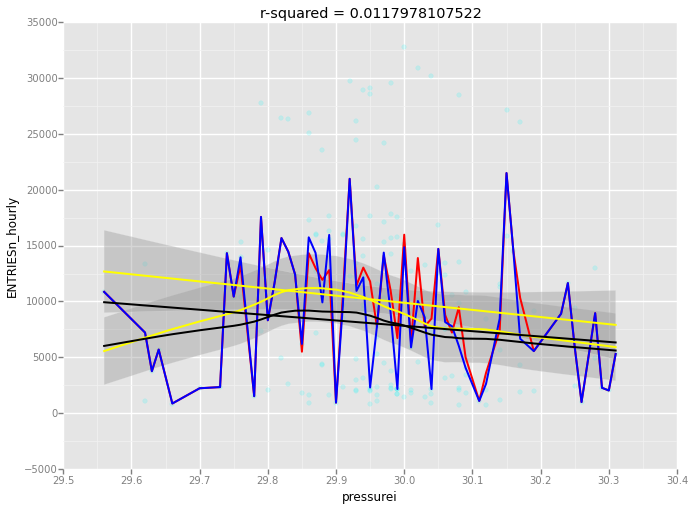

<ggplot: (305211877)>


In [117]:
station = turnstile_weather[turnstile_weather.station == '59 ST-COLUMBUS'].reset_index()
result = check_relation(station, 'pressurei')

# Analyzing different parameters (and their relation with nº entries)

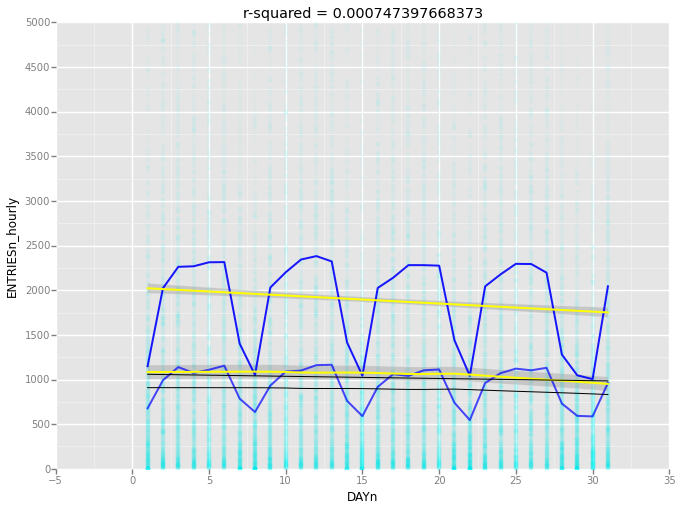

<ggplot: (327232025)>


In [161]:
check_relation(turnstile_weather, 'DAYn')

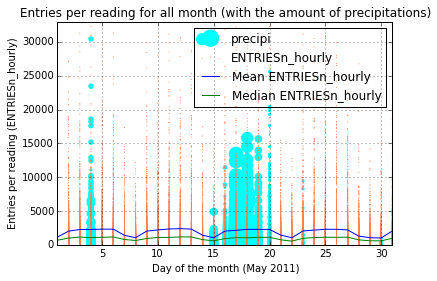

In [294]:
mean_entries = turnstile_weather.groupby('DAYn', as_index=False).mean().reset_index()
median_entries = turnstile_weather.groupby('DAYn', as_index=False).median().reset_index()

my_dpi = 96
plt.figure(figsize=(480/my_dpi,360/my_dpi), dpi=my_dpi)
# turnstile_weather.plot(kind='scatter', x='DAYn', y='ENTRIESn_hourly', c='precipi', cmap=plt.get_cmap('Blues'), edgecolors='none')
ax1 = turnstile_weather.plot(kind='scatter', x='DAYn', y='ENTRIESn_hourly', s=turnstile_weather['precipi']*1000, edgecolors='none', color='cyan', label='precipi')
turnstile_weather.plot(kind='scatter', x='DAYn', y='ENTRIESn_hourly', s=1, edgecolors='none', color='coral', label='ENTRIESn_hourly', ax=ax1)
mean_entries.plot(kind='line', x='DAYn', y='ENTRIESn_hourly', ax=ax1, label='Mean ENTRIESn_hourly')
median_entries.plot(kind='line', x='DAYn', y='ENTRIESn_hourly', ax=ax1, label='Median ENTRIESn_hourly')
plt.xlabel('Day of the month (May 2011)')
plt.ylabel('Entries per reading (ENTRIESn_hourly)')
plt.title('Entries per reading for all month (with the amount of precipitations)')
plt.ylim(0, 33000)
plt.savefig('../web-project/images/figure2.png', dpi=my_dpi)
plt.show()